# Displaying coloured isolines 2

With **Rainbow method** we can control everything. We can give it list of custom colours, thickness' and styles.  
If there is not enough elements in the list, we can tell Magics to either repeat the last one or cycle them. 

In this once cell example notebook, we're using  for **contour_level_selection_type = "count"**, so instead of giving Magics the interval for levels, we give number of levels we want.

At ECMWF  

#### From your workstation:
module swap (or load) Magics/new   
jupyter notebook  

load this notebook


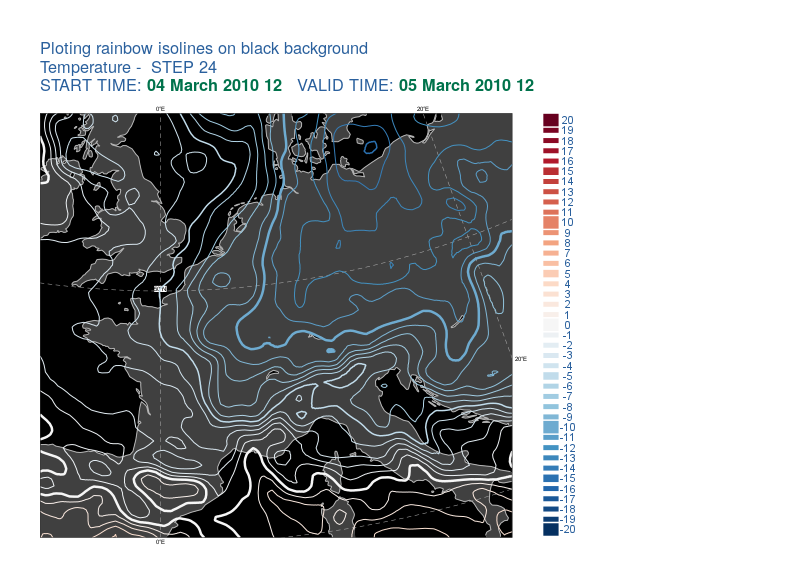

In [2]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "central_europe",
    subpage_clipping         = "on",
    page_id_line             = "off"
)

#Setting the coastline
coast = magics.mcoast(
    map_coastline_colour            = "grey",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 2,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey"
)

#Loading GRIB file
temperature = magics.mgrib(grib_input_file_name = "t850.grib")

#Defining the contour
t_cont = magics.mcont(
    contour_label                              = "off",
    legend                                     = "on",
    contour_level_selection_type               = "count",
    contour_level_count                        = 41,
    contour_min_level                          = -20,
    contour_max_level                          = 20,
    contour_highlight                          = "off",
    contour_line_colour_rainbow                = "on",
    contour_line_colour_rainbow_method         = "list",
    contour_line_colour_rainbow_colour_list    = ['#053061', '#0c3d73', '#134a86', '#1a5899', '#2166ac', 
                                                  '#2b71b2', '#347cb8', '#3c88bd', '#4393c3', '#5a9fca', 
                                                  '#6eacd1', '#80b8d7', '#92c5de', '#a2cde3', '#b2d5e7', 
                                                  '#c2ddec', '#d1e5f0', '#dbe9f2', '#e4eef4', '#eef2f5', 
                                                  '#f7f7f7', '#f9f0eb', '#fbe9df', '#fce2d3', '#fddbc7', 
                                                  '#fccdb5', '#fac0a4', '#f7b293', '#f4a582', '#ed9474', 
                                                  '#e68367', '#de725a', '#d6604d', '#cd5144', '#c4413c', 
                                                  '#bb2f33', '#b2182b', '#9f1128', '#8c0a25', '#790422', 
                                                  '#67001f'],
    contour_line_thickness_rainbow_list        = [5,2,2,2,2,3,2,2,2,2],
    contour_line_thickness_rainbow_list_policy = "cycle"
)

#Defining the legend
legend = magics.mlegend(
    legend_display_type   = 'continuous',
    legend_text_colour    = "#2b619e",
    legend_box_mode       = "positional",
    legend_text_font_size = "0.45",
    legend_box_x_position = 20.00,
    legend_box_y_position = 0.3,
    legend_box_x_length   = 1.8,
    legend_box_y_length   = 17.3)

#Setting the title
title = magics.mtext( 
    text_lines          = ["Ploting rainbow isolines on black background",
                           "<grib_info key='name'/> -  STEP <grib_info key='step'/>",
                           "START TIME: <font colour='evergreen' style='bold'><grib_info key='base-date' format='%d %B %Y %H'/></font>   VALID TIME: <font colour='evergreen' style='bold'><grib_info key='valid-date' format='%d %B %Y %H'/></font>"],
    text_justification  = 'left',
    text_font_size      = 0.7,
    text_mode           = "automatic",
    text_colour         = "#2b619e") 

#Plotting
magics.plot(projection, coast, temperature, t_cont, legend, title)